In [113]:
import wandb
import pandas as pd
import numpy as np
import seaborn as sns
from pydantic import BaseModel

In [114]:
class RunData(BaseModel):
    run_path: str

In [115]:
RUNS: dict[str, RunData] = {
    "InceptionV3-No-Preprocessing-100-Epoch": RunData(
        run_path="silvan-wiedmer-fhgr/VisionTransformer/uxlv6ohn"
    ),
    "DeiT-No-Preprocessing-100-Epoch": RunData(
        run_path="silvan-wiedmer-fhgr/VisionTransformer/tudgtvng"
    ),
    "Hybrid-Preprocessing-100-Epoch": RunData(
        run_path="silvan-wiedmer-fhgr/VisionTransformer/arj9940n"
    ),
}

In [165]:
RUNS: dict[str, RunData] = {
    "CNN-Preprocessing": RunData(run_path="silvan-wiedmer-fhgr/VisionTransformer/54zn25vw"),
    "CNN-No-Preprocessing": RunData(run_path="silvan-wiedmer-fhgr/VisionTransformer/qjyk03li"),
    "InceptionV3-Preprocessing": RunData(run_path="silvan-wiedmer-fhgr/VisionTransformer/7jsq6j0z"),
    "InceptionV3-No-Preprocessing": RunData(run_path="silvan-wiedmer-fhgr/VisionTransformer/fudrwisc"),
    "ViT-Preprocessing": RunData(run_path="silvan-wiedmer-fhgr/VisionTransformer/o0s7du2i"),
    "ViT-No-Preprocessing": RunData(run_path="silvan-wiedmer-fhgr/VisionTransformer/kd0mr7el"),
    "ViT-Lite-Preprocessing": RunData(run_path="silvan-wiedmer-fhgr/VisionTransformer/5622jway"),
    "ViT-Lite-No-Preprocessing": RunData(run_path="silvan-wiedmer-fhgr/VisionTransformer/2i5780q1"),
    "DeiT-Preprocessing": RunData(run_path="silvan-wiedmer-fhgr/VisionTransformer/uf8vz397"),
    "DeiT-No-Preprocessing": RunData(run_path="silvan-wiedmer-fhgr/VisionTransformer/q3kr64sx"),
    "Hybrid-Preprocessing": RunData(run_path="silvan-wiedmer-fhgr/VisionTransformer/mdw8ucu3"),
    "Hybrid-No-Preprocessing": RunData(run_path="silvan-wiedmer-fhgr/VisionTransformer/tttuvx7n")
}

In [166]:
api = wandb.Api()

In [167]:
def get_runtime_seconds(df: pd.DataFrame, key: str = "_runtime") -> np.float64:
    return df[key].values[-1]

In [168]:
def ws_to_kwh(ws: np.float64) -> np.float64:
    return ws / (3600 * 1000)

In [169]:
def calculate_sustainable_accuracy_metric(accuracy: float, electricity_kwh: float, alpha: float = 5, beta: float = 5) -> float:
    return beta * (accuracy**alpha / np.log10(electricity_kwh))

In [244]:
model_performance = {
    "Model": [],
    "EnergyConsumption": [],
    "EnergyConsumptionWs": [],
    "TestAccuracy": []
}

In [245]:
for run_name, run_data in RUNS.items():
    print(run_name, run_data)
    run = api.run(run_data.run_path)
    df_system_metrics = run.history(stream="system")

    df_power_usage = pd.DataFrame({"power": df_system_metrics["system.gpu.0.powerWatts"], "runtime": df_system_metrics["_runtime"]})
    df_power_usage.dropna(inplace=True)

    model_performance["Model"].append(run_name)
    model_performance["EnergyConsumption"].append(ws_to_kwh(np.trapezoid(df_power_usage["power"], df_power_usage["runtime"])))
    model_performance["EnergyConsumptionWs"].append(np.trapezoid(df_power_usage["power"], df_power_usage["runtime"]))
    model_performance["TestAccuracy"].append(run.summary.get("test_acc") * 100)

CNN-Preprocessing run_path='silvan-wiedmer-fhgr/VisionTransformer/54zn25vw'
CNN-No-Preprocessing run_path='silvan-wiedmer-fhgr/VisionTransformer/qjyk03li'
InceptionV3-Preprocessing run_path='silvan-wiedmer-fhgr/VisionTransformer/7jsq6j0z'
InceptionV3-No-Preprocessing run_path='silvan-wiedmer-fhgr/VisionTransformer/fudrwisc'
ViT-Preprocessing run_path='silvan-wiedmer-fhgr/VisionTransformer/o0s7du2i'
ViT-No-Preprocessing run_path='silvan-wiedmer-fhgr/VisionTransformer/kd0mr7el'
ViT-Lite-Preprocessing run_path='silvan-wiedmer-fhgr/VisionTransformer/5622jway'
ViT-Lite-No-Preprocessing run_path='silvan-wiedmer-fhgr/VisionTransformer/2i5780q1'
DeiT-Preprocessing run_path='silvan-wiedmer-fhgr/VisionTransformer/uf8vz397'
DeiT-No-Preprocessing run_path='silvan-wiedmer-fhgr/VisionTransformer/q3kr64sx'
Hybrid-Preprocessing run_path='silvan-wiedmer-fhgr/VisionTransformer/mdw8ucu3'
Hybrid-No-Preprocessing run_path='silvan-wiedmer-fhgr/VisionTransformer/tttuvx7n'


In [246]:
model_performance

{'Model': ['CNN-Preprocessing',
  'CNN-No-Preprocessing',
  'InceptionV3-Preprocessing',
  'InceptionV3-No-Preprocessing',
  'ViT-Preprocessing',
  'ViT-No-Preprocessing',
  'ViT-Lite-Preprocessing',
  'ViT-Lite-No-Preprocessing',
  'DeiT-Preprocessing',
  'DeiT-No-Preprocessing',
  'Hybrid-Preprocessing',
  'Hybrid-No-Preprocessing'],
 'EnergyConsumption': [np.float64(0.0029392426293507385),
  np.float64(0.0030197107032271034),
  np.float64(0.003731435753610852),
  np.float64(0.005098741235321594),
  np.float64(0.019038026339772248),
  np.float64(0.015919648567565284),
  np.float64(0.002479577001787389),
  np.float64(0.0030560915321437227),
  np.float64(0.011415773472281758),
  np.float64(0.009148190017392884),
  np.float64(0.008426223225977449),
  np.float64(0.005771525752496003)],
 'EnergyConsumptionWs': [np.float64(10581.273465662658),
  np.float64(10870.958531617573),
  np.float64(13433.168712999068),
  np.float64(18355.46844715774),
  np.float64(68536.89482318009),
  np.float64(5

In [247]:
df_model_performance = pd.DataFrame(model_performance)
df_model_performance

,Model,EnergyConsumption,EnergyConsumptionWs,TestAccuracy
0,CNN-Preprocessing,0.002939,10581.273466,65.753424
1,CNN-No-Preprocessing,0.003020,10870.958532,70.547944
2,InceptionV3-Preprocessing,0.003731,13433.168713,82.534248
3,InceptionV3-No-Preprocessing,0.005099,18355.468447,86.643833
4,ViT-Preprocessing,0.019038,68536.894823,77.397260
5,ViT-No-Preprocessing,0.015920,57310.734843,75.684932
6,ViT-Lite-Preprocessing,0.002480,8926.477206,73.630137
7,ViT-Lite-No-Preprocessing,0.003056,11001.929516,76.027397
8,DeiT-Preprocessing,0.011416,41096.784500,79.109589
9,DeiT-No-Preprocessing,0.009148,32933.484063,84.589041


In [ ]:
df_model_performance["AccuracyPerkWh"] = df_model_performance["TestAccuracy"] / df_model_performance["EnergyConsumptionkWh"]

In [257]:
df_model_performance["SAM"] = calculate_sustainable_accuracy_metric(df_model_performance["TestAccuracy"], df_model_performance["EnergyConsumptionWs"])

In [258]:
df_model_performance

,Model,EnergyConsumption,EnergyConsumptionWs,TestAccuracy,AccuracyPerkWh,SAM
0,CNN-Preprocessing,0.002939,10581.273466,65.753424,22370.873201,1.527024e+09
1,CNN-No-Preprocessing,0.003020,10870.958532,70.547944,23362.484437,2.164770e+09
2,InceptionV3-Preprocessing,0.003731,13433.168713,82.534248,22118.630223,4.638553e+09
3,InceptionV3-No-Preprocessing,0.005099,18355.468447,86.643833,16993.181047,5.726180e+09
4,ViT-Preprocessing,0.019038,68536.894823,77.397260,4065.403571,2.871564e+09
5,ViT-No-Preprocessing,0.015920,57310.734843,75.684932,4754.183560,2.609583e+09
6,ViT-Lite-Preprocessing,0.002480,8926.477206,73.630137,29694.636195,2.738900e+09
7,ViT-Lite-No-Preprocessing,0.003056,11001.929516,76.027397,24877.329903,3.142544e+09
8,DeiT-Preprocessing,0.011416,41096.784500,79.109589,6929.849233,3.357810e+09
9,DeiT-No-Preprocessing,0.009148,32933.484063,84.589041,9246.533023,4.793239e+09


Text(0.5, 1.0, 'SAM')

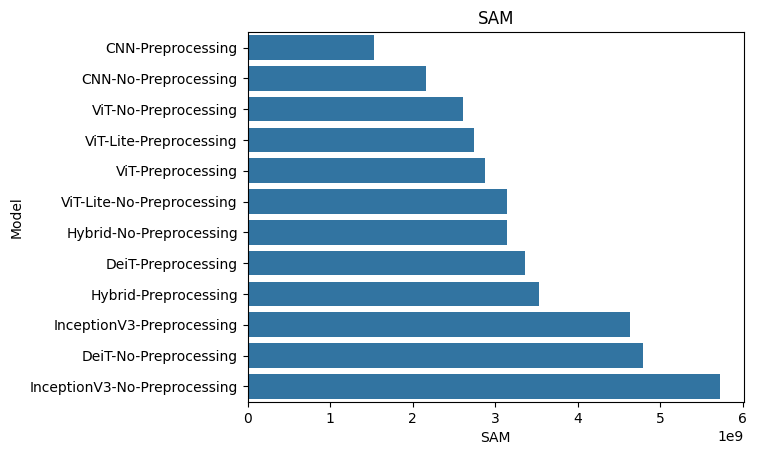

In [262]:
ax = sns.barplot(df_model_performance.sort_values(["SAM"]), x="SAM", y="Model", orient="y")
ax.set_title("SAM")

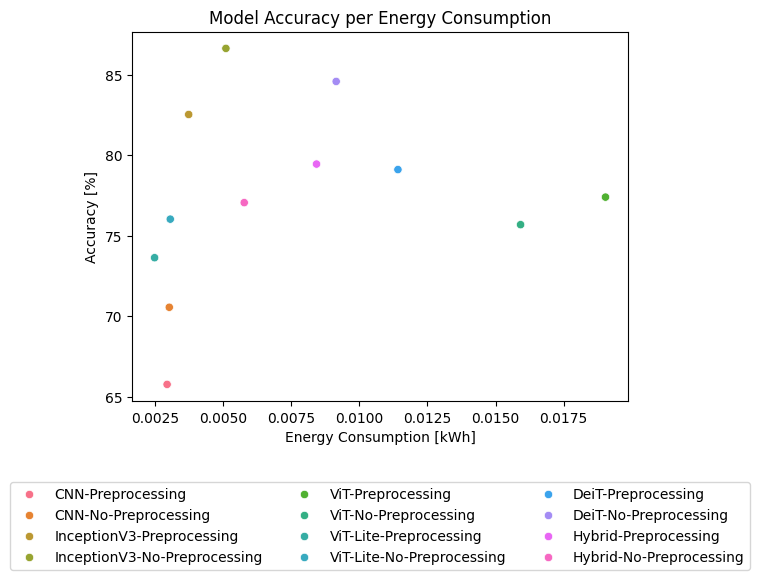

In [260]:
ax = sns.scatterplot(df_model_performance, x="EnergyConsumption", y="TestAccuracy", hue="Model")
ax.set_title("Model Accuracy per Energy Consumption")
ax.set(xlabel="Energy Consumption [kWh]", ylabel="Accuracy [%]")
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=3)